<a href="https://colab.research.google.com/github/vedusahu92002/CodeCasa/blob/main/Gender_and_Age_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

Load Dataset

In [4]:
BASE_DIR = '/content/drive/MyDrive/UTKFace'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Labels age, gender, ethnicity
image_paths = []
age_labels = []
gender_label = []

for filename in tqdm(os.listdir(BASE_DIR)):
  image_path = os.path.join(BASE_DIR, filename)
  temp = filename.split('_')
  age = int(temp[0])
  gender = int(temp[1])
  image_paths.append(image_path)
  age_labels.append(age)
  gender_label.append(gender)

  0%|          | 0/23728 [00:00<?, ?it/s]

In [8]:
#Convert to data frame
df = pd.DataFrame()
df['image'],df['age'],df['gender'] = image_paths, age_labels, gender
df.head()

,image,age,gender
0,/content/drive/MyDrive/UTKFace/80_0_1_20170111...,80,1
1,/content/drive/MyDrive/UTKFace/80_0_1_20170116...,80,1
2,/content/drive/MyDrive/UTKFace/80_0_2_20170112...,80,1
3,/content/drive/MyDrive/UTKFace/80_0_2_20170112...,80,1
4,/content/drive/MyDrive/UTKFace/80_1_0_20170109...,80,1


In [9]:
#MAp labels for gender
gender_dict = {0:'Male', 1:'Female'}

Exploratory Data Analysis

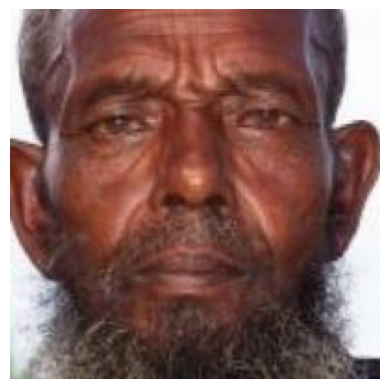

In [10]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

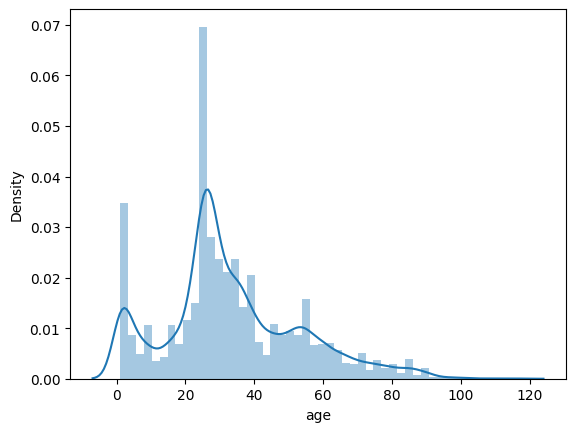

In [11]:
sns.distplot(df['age']);

<Axes: ylabel='count'>

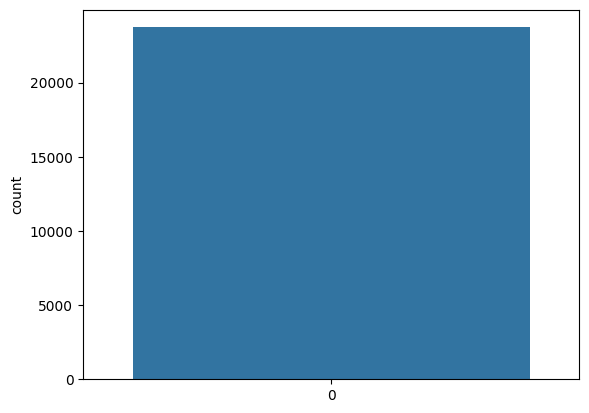

In [12]:
sns.countplot(df['gender'])

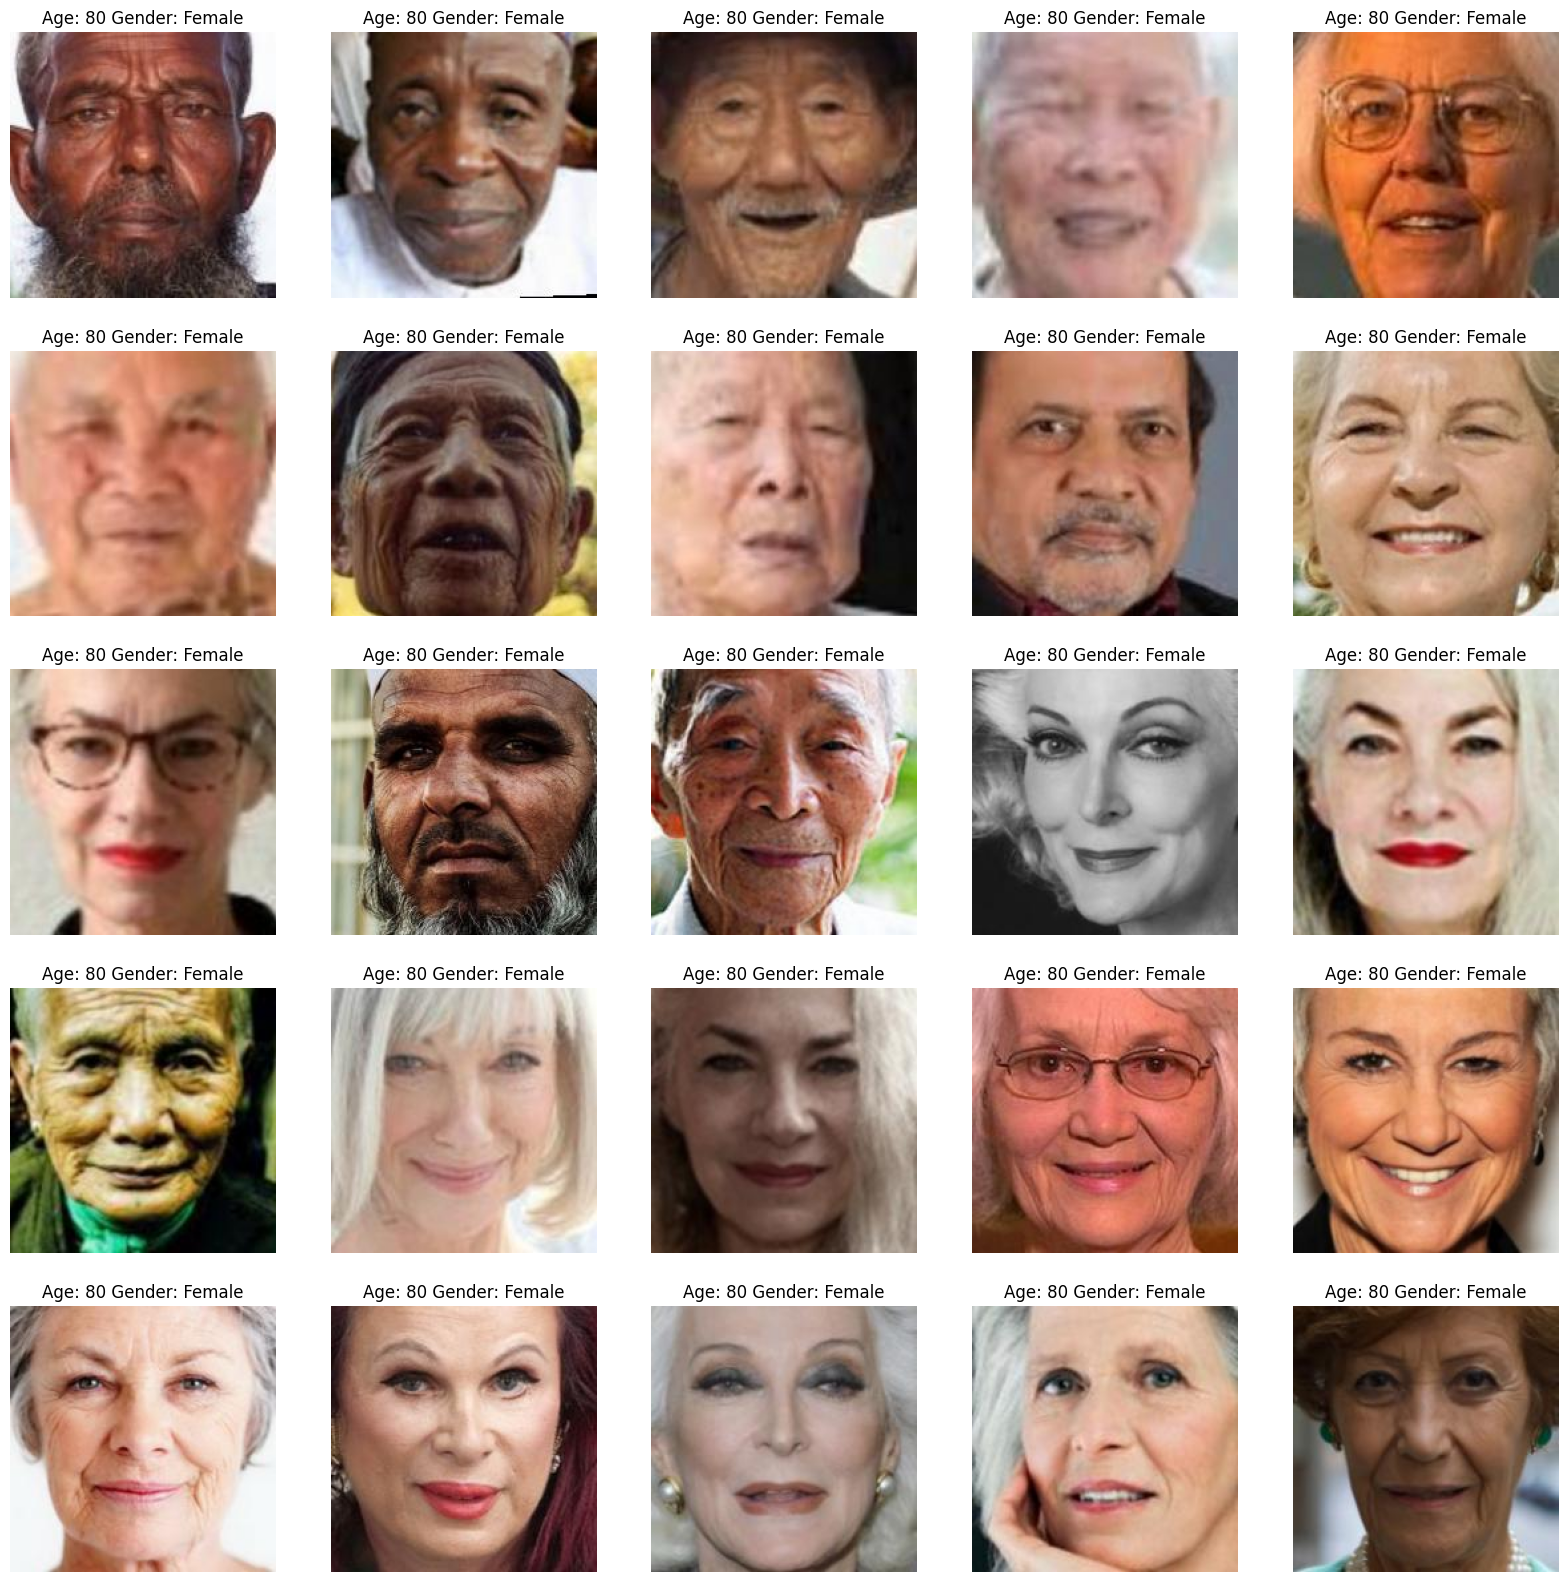

In [13]:
#To display grid of images
plt.figure(figsize = (20,20))
files = df.iloc[0:25]

for index,file,age,gender in files.itertuples():
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
  plt.axis('off')

In [14]:
def extract_features(images):
  features = []
  for image in tqdm(images):
    img = load_img(image,grayscale=True)
    img = img.resize((128,128),Image.ANTIALIAS)
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  #Ignore this step if using RGB
  features = features.reshape(len(features),128,128,1)
  return features

In [ ]:
X = extract_features(df['image'])

  0%|          | 0/23728 [00:00<?, ?it/s]

In [26]:
X.shape

(23728, 128, 128, 1)

In [27]:
#Normalise the images
X = X/255.0

In [28]:

y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [29]:
input_shape = (128,128,1)

##Model Creation


In [2]:
inputs = Input((input_shape))
#Convolutional Layers
conv_1 = Conv2D(32,kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size = (2,2))(conv_1)
conv_2 = Conv2D(64,kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size = (2,2))(conv_2)
conv_3 = Conv2D(128,kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size = (2,2))(conv_3)
conv_4 = Conv2D(256,kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size = (2,2))(conv_4)

flatten = Flatten() (maxp_4)

#fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

model.compile(loss=['binary_crossentropy','mae'], optimizer='adam',metrics=['accuracy'])

NameError: ignored

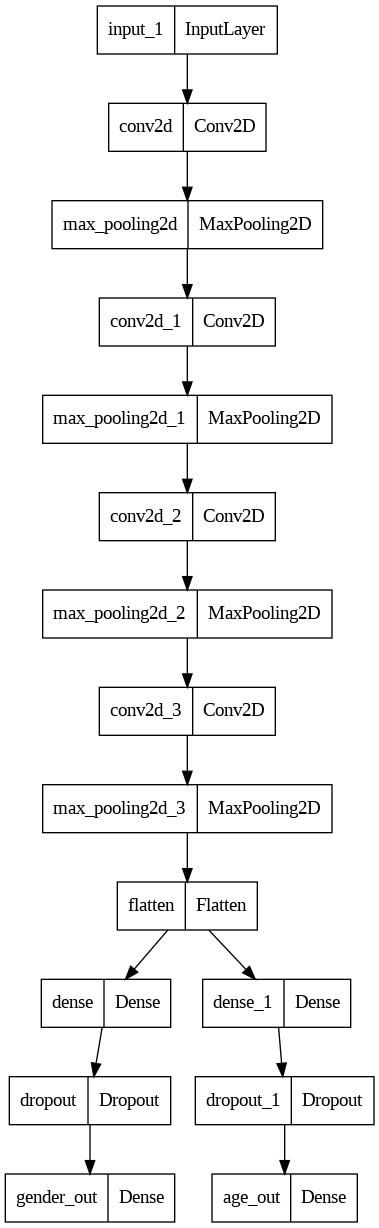

In [31]:

#plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [32]:
#Train model
history = model.fit(x=X,y=[y_gender,y_age], batch_size = 32, epochs=30, validation_split=0.2)

Epoch 1/30
594/594 [==============================] - 458s 768ms/step - loss: 14.6427 - gender_out_loss: 0.0017 - age_out_loss: 14.6410 - gender_out_accuracy: 0.9986 - age_out_accuracy: 0.0000e+00 - val_loss: 16.8891 - val_gender_out_loss: 3.3980e-14 - val_age_out_loss: 16.8891 - val_gender_out_accuracy: 1.0000 - val_age_out_accuracy: 0.2366
Epoch 2/30
594/594 [==============================] - 447s 752ms/step - loss: 11.6178 - gender_out_loss: 1.5818e-09 - age_out_loss: 11.6178 - gender_out_accuracy: 1.0000 - age_out_accuracy: 0.0000e+00 - val_loss: 8.3729 - val_gender_out_loss: 2.8147e-10 - val_age_out_loss: 8.3729 - val_gender_out_accuracy: 1.0000 - val_age_out_accuracy: 0.2065
Epoch 3/30
594/594 [==============================] - 449s 756ms/step - loss: 9.8959 - gender_out_loss: 9.6406e-09 - age_out_loss: 9.8959 - gender_out_accuracy: 1.0000 - age_out_accuracy: 0.0000e+00 - val_loss: 6.9973 - val_gender_out_loss: 7.5759e-09 - val_age_out_loss: 6.9973 - val_gender_out_accuracy: 1.00

## Plot the results

In [1]:
# Plot results for Gender

acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc,'b', label='Training Accuracy')
plt.plot(epochs, val_acc,'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']
epochs = range(len(loss))

plt.plot(epochs,loss,'b', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


NameError: ignored

In [ ]:
# Plot results for age

loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs,loss,'b', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

##Prediction with Test Data

In [25]:
image_index = 100
print('original Gender:',gender_dict[y_gender[image_index]], 'Original Age:',y_age[iamge_index])

#predict from model
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict(round(pred[0][0][0]))
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),cmap='gray');

NameError: ignored